In [649]:
import PIL
from PIL import Image
import glob
import numpy as np
import cv2
import os
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models

#print("Pillow Version: ", PIL.__version__)


In [650]:
folder_path = "/Users/mishaynaidoo/Desktop/UCT/EEE4114F/SymbolsToSPICE/Training_Data/Resized_Data/Batteries"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

batteries_array = np.array(images)/255

In [651]:
folder_path = "/Users/mishaynaidoo/Desktop/UCT/EEE4114F/SymbolsToSPICE/Training_Data/Resized_Data/Resistors"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

resistors_array = np.array(images)/255

In [652]:
folder_path = "/Users/mishaynaidoo/Desktop/UCT/EEE4114F/SymbolsToSPICE/Training_Data/Resized_Data/Capacitors"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

capacitor_array = np.array(images)/255

In [653]:
folder_path = "/Users/mishaynaidoo/Desktop/UCT/EEE4114F/SymbolsToSPICE/Training_Data/Resized_Data/Inductors"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

inductors_array = np.array(images)/255

In [654]:
folder_path = "/Users/mishaynaidoo/Desktop/UCT/EEE4114F/SymbolsToSPICE/Training_Data/Resized_Data/Ground"

images = []

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        # Resize the image if necessary
        img = cv2.resize(img, (56, 56))
        # Convert the image to grayscale if needed
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)

ground_array = np.array(images)/255

In [655]:
#print(np.shape(ground_array))
Labels = ['Ground', 'Resistor', 'Inductor', 'Capacitor', 'Battery']


In [656]:
ground_label = np.zeros(210)
resistor_label = np.ones(210)
inductor_label = 2*np.ones(210)
capacitor_label = 3*np.ones(210)
battery_label = 4*np.ones(210)

In [657]:
ground_array = list(zip(ground_array,ground_label))
resistors_array = list(zip(resistors_array, resistor_label))
inductors_array = list(zip(inductors_array, inductor_label))
capacitor_array = list(zip(capacitor_array, capacitor_label))
batteries_array = list(zip(batteries_array, battery_label))



In [658]:
data_with_labels = np.concatenate((ground_array,resistors_array,inductors_array,capacitor_array,batteries_array))

In [659]:
random.shuffle(data_with_labels)

In [660]:
shuffled_data, shuffled_labels = zip(*data_with_labels)

In [661]:
#print(np.shape(shuffled_data))
train_data,test_data,train_labels,test_labels = train_test_split(shuffled_data, shuffled_labels, test_size = 0.2)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.1)


In [662]:
#print(train_labels[0])
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(Labels[int(y[index])])

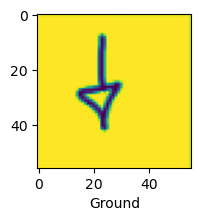

In [663]:
plot_sample(train_data,train_labels,7)

In [664]:
fox = models.Sequential([
    layers.Conv2D(filters = 4, kernel_size = (3,3), activation = 'relu', input_shape=(56,56,1)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(5, activation = 'softmax')


])

In [665]:
fox.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [666]:
train_data = np.asarray(train_data)
train_labels = np.asarray(train_labels)

fox.fit(train_data,train_labels,epochs = 40)

Epoch 1/40
24/24 [==============================] - 1s 24ms/step - loss: 1.3060 - accuracy: 0.5040
Epoch 2/40
24/24 [==============================] - 1s 21ms/step - loss: 1.1112 - accuracy: 0.5661
Epoch 3/40
24/24 [==============================] - 1s 21ms/step - loss: 0.9216 - accuracy: 0.6706
Epoch 4/40
24/24 [==============================] - 1s 21ms/step - loss: 0.7552 - accuracy: 0.7328
Epoch 5/40
24/24 [==============================] - 1s 21ms/step - loss: 0.6437 - accuracy: 0.7646
Epoch 6/40
24/24 [==============================] - 1s 27ms/step - loss: 0.5688 - accuracy: 0.7923
Epoch 7/40
24/24 [==============================] - 1s 24ms/step - loss: 0.5025 - accuracy: 0.8399
Epoch 8/40
24/24 [==============================] - 1s 21ms/step - loss: 0.4330 - accuracy: 0.8743
Epoch 9/40
24/24 [==============================] - 1s 21ms/step - loss: 0.3794 - accuracy: 0.9008
Epoch 10/40
24/24 [==============================] - 1s 22ms/step - loss: 0.3386 - accuracy: 0.9061
Epoch 11/

In [670]:
fox.evaluate(train_data,train_labels)

24/24 [==============================] - 1s 14ms/step - loss: 0.0242 - accuracy: 1.0000


[0.02415117435157299, 1.0]

In [671]:
val_data = np.asarray(val_data)
val_labels = np.asarray(val_labels)
fox.evaluate(val_data,val_labels)

3/3 [==============================] - 0s 14ms/step - loss: 0.3381 - accuracy: 0.9048


[0.33811506628990173, 0.9047619104385376]

In [672]:
test_data = np.asarray(test_data)
test_labels = np.asarray(test_labels)
fox.evaluate(test_data, test_labels)

7/7 [==============================] - 0s 11ms/step - loss: 0.2868 - accuracy: 0.9286


[0.28682711720466614, 0.9285714030265808]